In [263]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib notebook
import matplotlib.pyplot as plt



In [264]:
pos_unigram_scores = pd.read_csv('./data/unigram-pmi-positive-scores.csv')
pos_bigram_scores = pd.read_csv('./data/bigram-pmi-positive-scores.csv')
pos_trigram_scores = pd.read_csv('./data/trigram-pmi-positive-scores.csv')

In [320]:
neg_unigram_scores = pd.read_csv('./data/unigram-pmi-negative-scores.csv')
neg_bigram_scores = pd.read_csv('./data/bigram-pmi-negative-scores.csv')
neg_trigram_scores = pd.read_csv('./data/trigram-pmi-negative-scores.csv')

#### The class for acquiriung top trigrams, bigrams and inigrams with specific threshold

In [218]:
class ToNgramManager:
    INVALID_SCORE = -100
    
    def __init__(self, unigram_scores, bigram_scores, trigram_scores):
        self.trigram_scores = trigram_scores
        self.bigram_scores = bigram_scores
        self.unigram_scores = unigram_scores
        
        self.trigram_score_threshold = 0.2
        self.bigram_score_threshold = 0.2
        self.unigram_score_threshold = 0.2
        
        self.__ignore_score = False
        
    
    def ignore_score(self, enabled):
        self.__ignore_score = enabled
        
        
    def find_top_unigrams(self, text: str):
        valuable_trigrams = self.find_top_ngrams_for_text(text, 
                                                          self.unigram_scores, 
                                                          (1,1), 
                                                          self.unigram_score_threshold)
        
        return valuable_trigrams


        
    def find_top_bigrams(self, text: str):
        valuable_trigrams = self.find_top_ngrams_for_text(text, 
                                                          self.bigram_scores, 
                                                          (2,2), 
                                                          self.bigram_score_threshold)
        
        return valuable_trigrams


    
    def find_top_trigrams(self, text: str):
        valuable_trigrams = self.find_top_ngrams_for_text(text, 
                                                          self.trigram_scores, 
                                                          (3,3), 
                                                          self.trigram_score_threshold)
        
        return valuable_trigrams
    
        
     
    def find_top_ngrams_for_text(self, text: str, ngram_scores, ngram_range, threshold: int):
        ngrams = ToNgramManager.get_all_ngrams_for_text(text, ngram_range)
        
        valuable_ngrams = list()
        
        for ngram in ngrams:
            score = self.find_ngram_score(ngram_scores, ngram)
            
            if score == self.INVALID_SCORE:
                continue
                
            if self.__ignore_score:
                valuable_ngrams.append(ngram)
                continue
            
            if score >= threshold:
                valuable_ngrams.append(ngram)
            
            
        return valuable_ngrams

    @staticmethod
    def find_ngram_score(ngram_scores, ngram: str):
        found_df = ngram_scores[ngram_scores['ngram'] == ngram]
        if len(found_df) == 0:
            return ToNgramManager.INVALID_SCORE

        return found_df['score'].values[0] 
    
    @staticmethod
    def get_all_ngrams_for_text(text: str, ngram_range):
        try:
            vectorizer = CountVectorizer(ngram_range=ngram_range)
            countvector = vectorizer.fit_transform([text])
            ngrams = vectorizer.get_feature_names()
            return ngrams
        except:
            return []

### Load dataset

In [183]:
df = pd.read_csv('./data/pos-neg-dataset.csv')

In [184]:
df.head()

,text,pos_neg_identifier
0,Ідеально для ділової поїздки! Господар зустрів...,1
1,"Затишний, чистий номер з усіма зручностями. Чу...",1
2,"При бронюванні вказала час прибуття о 7 ранку,...",0
3,"Чисто, тихо, комфортно. Зустрів і провів приєм...",1
4,На барі кава тільки 3 в 1. Хотілося звичайної ...,0


In [190]:
df['text'][0]

'Ідеально для ділової поїздки! Господар зустрів о шостій ранку, привітний. 22 поверх, вид з вікна на море. Все поряд, супермаркет, розваги, ресторани. Було пізнє виселення без доплати. Обов"зково зупинюся тут наступного разу.'

In [191]:
def get_pos_neg_text(df):
    pos, neg = [], []
    for i in range(0, len(df)):
        if df['pos_neg_identifier'][i] == 1:
            pos.append(df['text'][i])
        elif df['pos_neg_identifier'][i] == 0:
            neg.append(df['text'][i])
            
    return pos, neg
        

In [192]:
pos_texts, neg_texts = get_pos_neg_text(df)

In [195]:
pos_texts[:5]

['Ідеально для ділової поїздки! Господар зустрів о шостій ранку, привітний. 22 поверх, вид з вікна на море. Все поряд, супермаркет, розваги, ресторани. Було пізнє виселення без доплати. Обов"зково зупинюся тут наступного разу.',
 'Затишний, чистий номер з усіма зручностями. Чудовий краєвид з вікна. Є можливість підігріти їжу та зробити чай/каву.',
 'Чисто, тихо, комфортно. Зустрів і провів приємний власник. В номері холодильник, в холі мікрохвильовка, чайник. Все що, на мій погляд, необхідно',
 "Зручне розташування,чудовий вигляд з вікна,в номері є все що потрібно,зустрів приємний і вічливий чоловік.Однозначно рекомендую,обов'язково повернемось з дружиною ще раз.",
 'Нові апартаменти на останньому поверсі ЖК, біля центрального входу до Аркадії. Чисто, недорого (лютий місяць), ввічливий господар. Поруч - "Сільпо", новий ТЦ і безліч закладів харчування. До центру 20 хв. на маршрутці.']

In [196]:
neg_texts[:5]

['При бронюванні вказала час прибуття о 7 ранку, на що отримала відповідь "за наявності". Про те, що раніше 12 я заселитися не зможу, дізналася тільки коли туди приїхала. Виявляється, мені про це повідомили о 4.45 електронним листом, коли я ще спала у потязі. Вважаю, що слід попереджати хоча б за 12 годин, щоб була можливість скоригувати плани. Також мені не дали, хоча я і просила, підтвердження оплати для оформлення відрядження.',
 'На барі кава тільки 3 в 1. Хотілося звичайної кави, найкраще заварної.',
 'Немає терміналу для оплати кредиткою, тільки готівка.',
 'Нема зауважень',
 'Були проблеми з заселенням. Господар не дуже гостинний і приємний.']

In [223]:
def calc_num_of_coincided_ngram(texts, find_ngram_fn):
    count = 0
    for text in texts:
        coincided_ngrams = find_ngram_fn(text)
        if len(coincided_ngrams) > 0:
            count += 1
    return count

In [261]:
def show_statistics(tops, procents_unigrams, title):
    labels = [f"top - {top}" for top in tops]
    values = procents_unigrams.tolist()
    indexes = np.arange(len(labels))
    plt.bar(indexes, values, 0.8)
    plt.xticks(indexes, labels)
    plt.grid()
    plt.ylim(0, 100)
    plt.ylabel('%')
    plt.title(title)
    plt.show()

## Unigrams

### positive

In [240]:
unigram_scores[:10]

,ngram,score
0,відмінне,0.241606
1,прекрасне,0.241606
2,простора,0.238721
3,доброзичливий,0.238471
4,просторий,0.237894
5,чудове,0.237260
6,уважний,0.236556
7,затишна,0.236074
8,гарне,0.233970
9,ідеальне,0.232891


In [247]:
unigram_scores[90:100]

,ngram,score
90,гарно,0.181815
91,надзвичайно,0.181815
92,пішки,0.178653
93,всім,0.178247
94,рекомендую,0.177459
95,велике,0.176746
96,супер,0.176460
97,моря,0.176139
98,самому,0.175333
99,дівчата,0.173219


In [241]:
tops = [5, 10, 20, 50 , 100]
num_of_coincided_unigrams_pos = []

In [242]:
for top in tops:
    top_ngram_mng = ToNgramManager(unigram_scores[:top], bigram_scores[:top], trigram_scores[:top])
    top_ngram_mng.ignore_score(True)
    
    num_of_coincided_unigrams = calc_num_of_coincided_ngram(pos_texts, 
                                                            lambda text: top_ngram_mng.find_top_unigrams(text))
    
    num_of_coincided_unigrams_pos.append(num_of_coincided_unigrams)
    

In [245]:
procents_unigrams = 100 * np.array(num_of_coincided_unigrams_pos) / (len(pos_texts))

In [249]:
procents_unigrams

array([ 5.30334015, 15.45330607, 39.93183367, 75.00340832, 87.77096115])

<IPython.core.display.Javascript object>


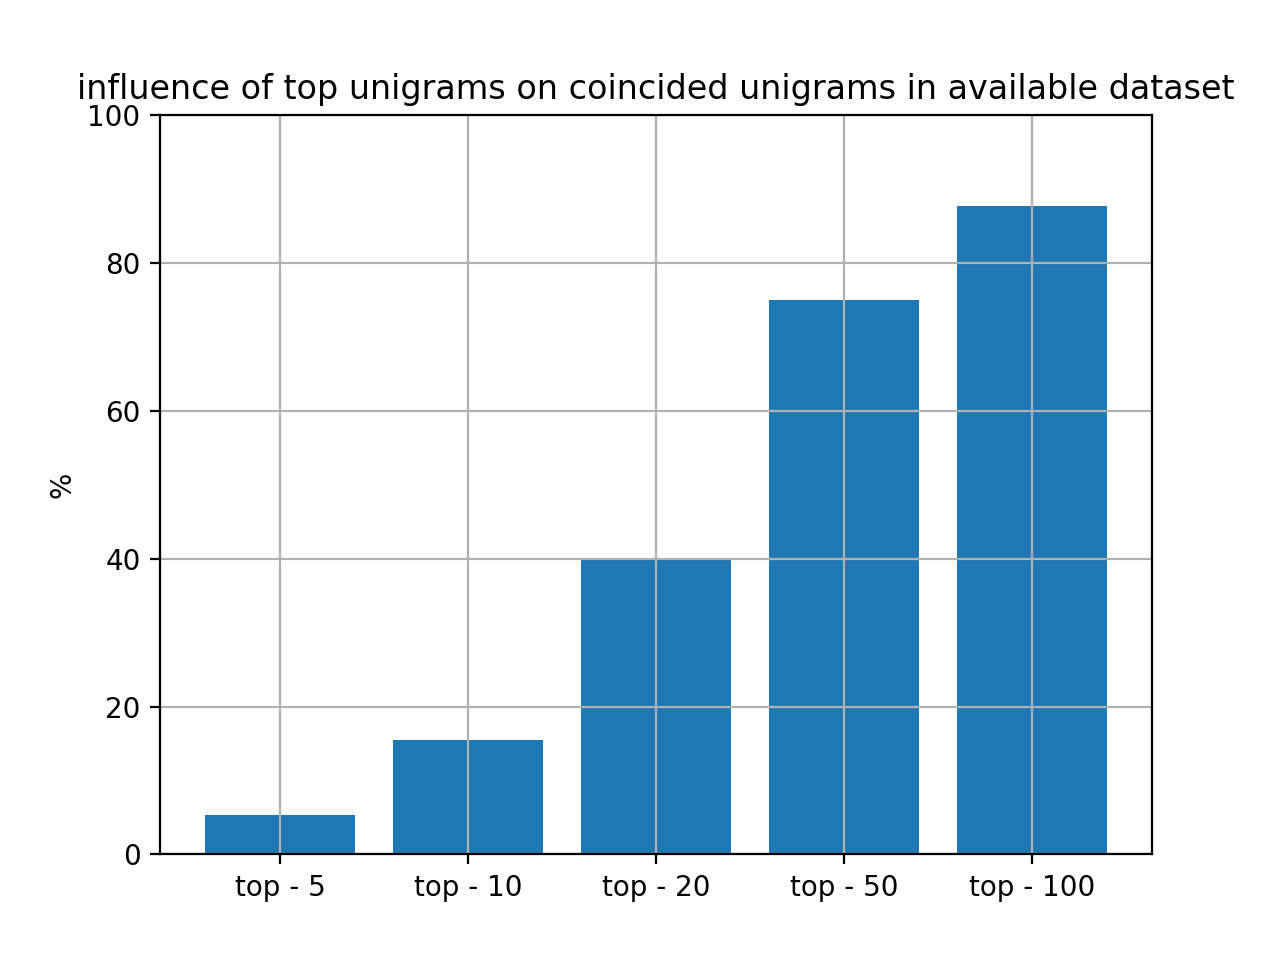

In [262]:
show_statistics(tops, procents_unigrams, "influence of top unigrams on coincided unigrams in available dataset")

### negative

In [293]:
neg_unigram_scores[:10]

,ngram,score
0,неприємний,0.366348
1,погана,0.363971
2,відсутня,0.358464
3,відсутній,0.357119
4,неможливо,0.355653
5,брудно,0.355335
6,погано,0.354805
7,тонкі,0.352569
8,шумоізоляція,0.342176
9,відсутність,0.342003


In [294]:
neg_unigram_scores[90:100]

,ngram,score
90,треба,0.218626
91,вони,0.214465
92,душу,0.214389
93,мабуть,0.214141
94,ранку,0.213488
95,зробити,0.212847
96,то,0.212770
97,щось,0.211176
98,або,0.210740
99,но,0.209679


In [295]:
tops = [5, 10, 20, 50 , 100]
num_of_coincided_unigrams_neg = []

In [296]:
for top in tops:
    top_ngram_mng = ToNgramManager(neg_unigram_scores[:top], None, None)
    top_ngram_mng.ignore_score(True)
    
    num_of_coincided_unigrams = calc_num_of_coincided_ngram(neg_texts, 
                                                            lambda text: top_ngram_mng.find_top_unigrams(text))
    
    num_of_coincided_unigrams_neg.append(num_of_coincided_unigrams)


In [309]:
procents_unigrams_neg = 100 * np.array(num_of_coincided_unigrams_neg) / (len(neg_texts))

<IPython.core.display.Javascript object>


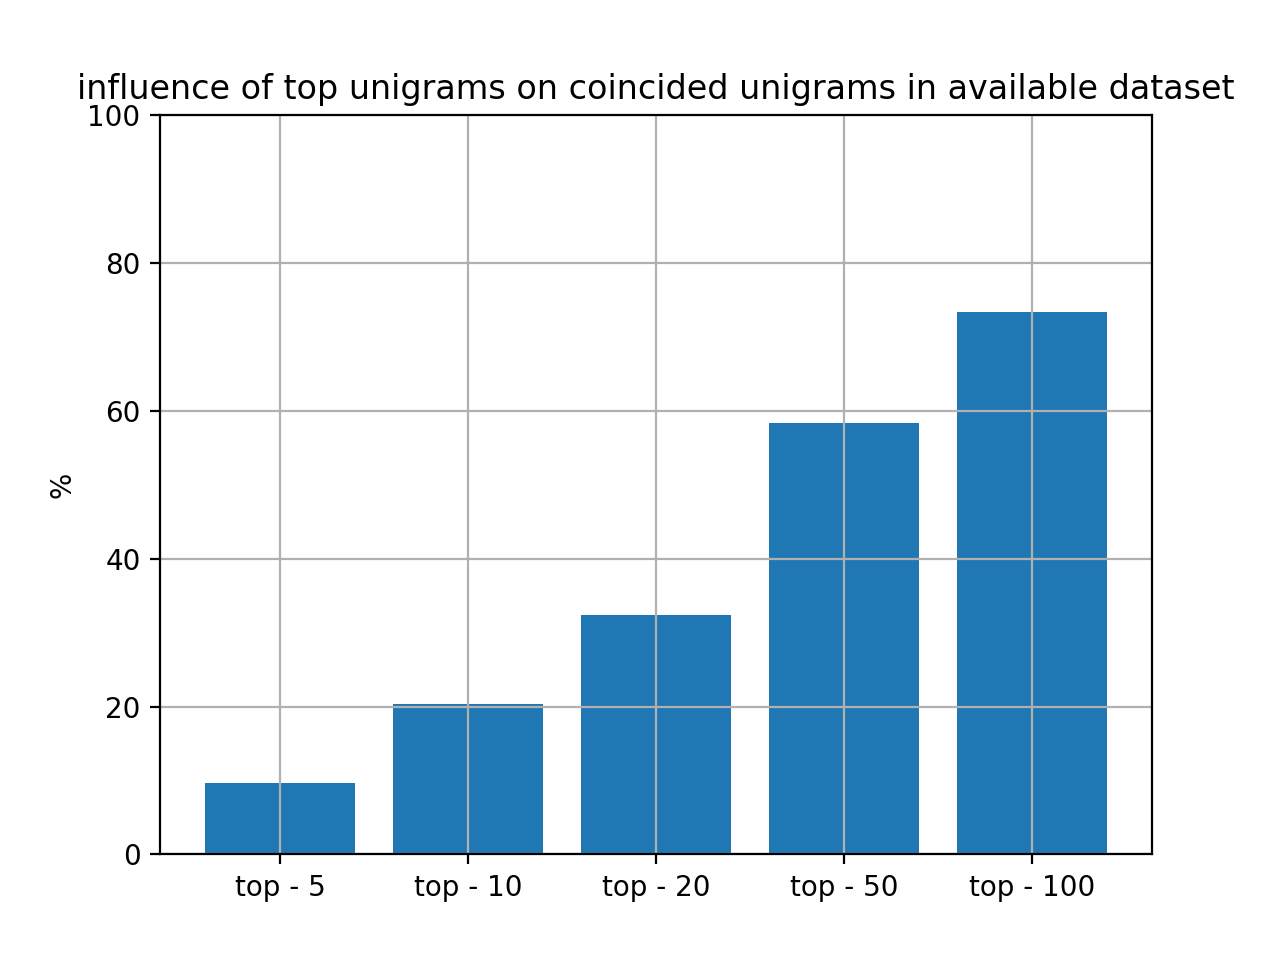

In [310]:
show_statistics(tops, procents_unigrams_neg, "influence of top unigrams on coincided unigrams in available dataset")

## Bigrams

### Positive

In [265]:
pos_bigram_scores[:10]

,ngram,score
0,затишно чисто,0.241606
1,комфортний номер,0.241606
2,тихе місце,0.241606
3,зручний номер,0.241606
4,чудовий сніданок,0.241606
5,чудовий персонал,0.241606
6,вічливий персонал,0.241606
7,гарне розташування,0.241606
8,гарний сніданок,0.241606
9,та ввічливий,0.241606


In [266]:
pos_bigram_scores[90:100]

,ngram,score
90,гарний готель,0.229542
91,привітний та,0.229486
92,зручні ліжка,0.229372
93,чисто зручно,0.228641
94,до площі,0.228378
95,площі ринок,0.227670
96,зручне місцерозташування,0.227596
97,самому центрі,0.227288
98,комфортні ліжка,0.227128
99,хороший готель,0.226883


In [267]:
tops = [5, 10, 20, 50 , 100]
num_of_coincided_bigrams_pos = []

In [278]:
for top in tops:
    top_ngram_mng = ToNgramManager(None, bigram_scores[:top], None)
    top_ngram_mng.ignore_score(True)
    
    num_of_coincided_bigrams = calc_num_of_coincided_ngram(pos_texts, 
                                                            lambda text: top_ngram_mng.find_top_bigrams(text))
    
    num_of_coincided_bigrams_pos.append(num_of_coincided_bigrams)
    

In [282]:
procents_bigrams = 100 * np.array(num_of_coincided_bigrams_pos) / (len(pos_texts))

In [283]:
procents_bigrams

array([ 1.88820723,  5.00340832,  8.46625767, 30.98159509, 50.10906612])

<IPython.core.display.Javascript object>


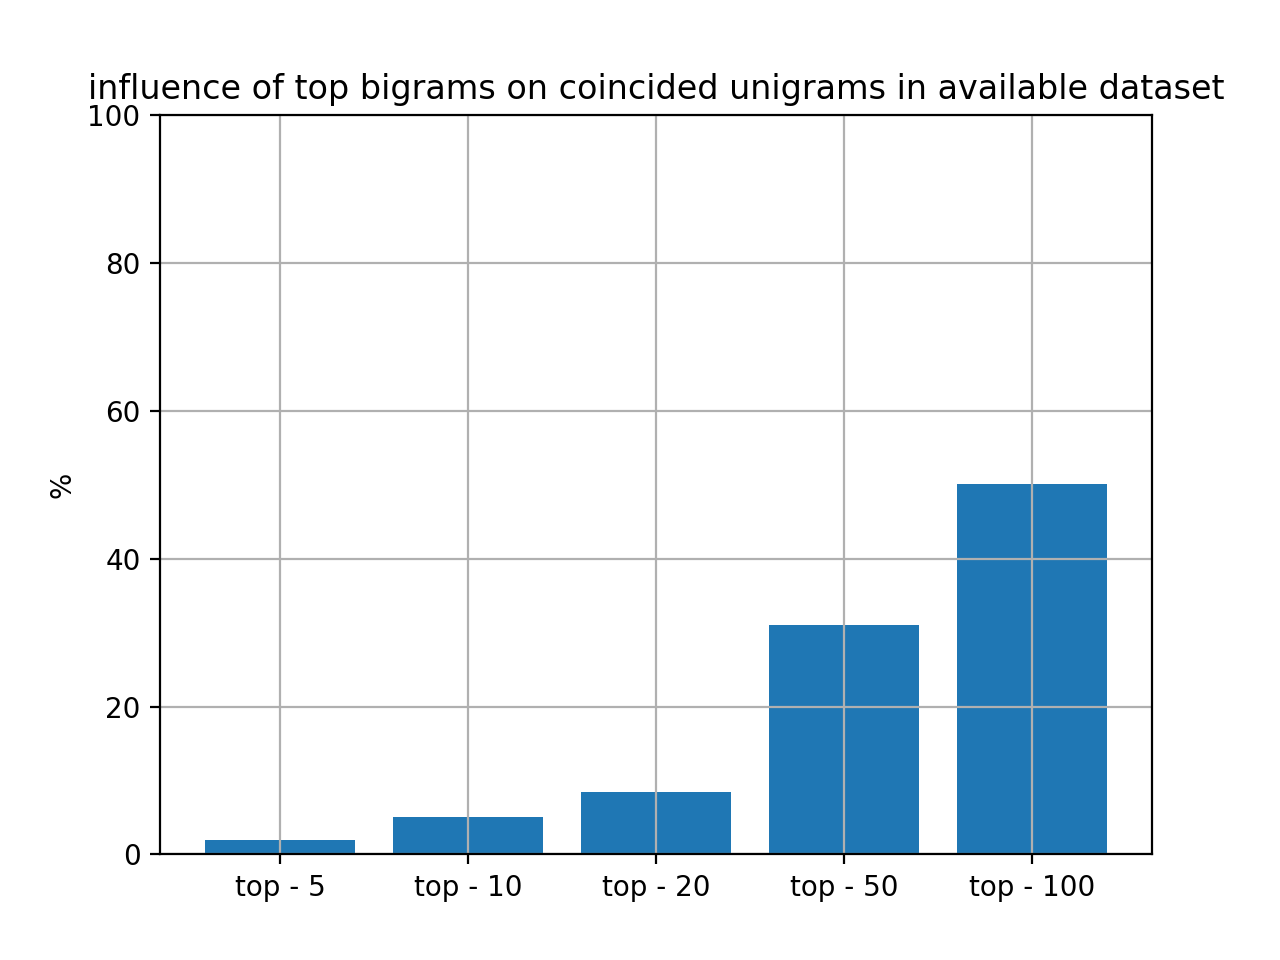

In [284]:
show_statistics(tops, procents_bigrams, "influence of top bigrams on coincided unigrams in available dataset")

### Negative

In [297]:
neg_bigram_scores[:10]

,ngram,score
0,погана шумоізоляція,0.369893
1,дуже тонкі,0.369893
2,дуже погана,0.369893
3,погана звукоізоляція,0.366016
4,неприємний запах,0.365697
5,чути все,0.363903
6,запах каналізації,0.362068
7,на підлогу,0.361119
8,чути як,0.360938
9,тонкі стіни,0.358804


In [298]:
neg_bigram_scores[90:100]

,ngram,score
90,що не,0.248340
91,на другому,0.248160
92,що це,0.246075
93,нам не,0.244955
94,ніхто не,0.243736
95,зовсім не,0.243287
96,за вікном,0.242788
97,до того,0.240259
98,на жаль,0.240047
99,просто не,0.238006


In [301]:
tops = [5, 10, 20, 50 , 100]
num_of_coincided_bigrams_neg = []

In [302]:
for top in tops:
    top_ngram_mng = ToNgramManager(None, neg_bigram_scores[:top], None)
    top_ngram_mng.ignore_score(True)
    
    num_of_coincided_bigrams = calc_num_of_coincided_ngram(pos_texts, 
                                                            lambda text: top_ngram_mng.find_top_bigrams(text))
    
    num_of_coincided_bigrams_neg.append(num_of_coincided_bigrams)
    

In [311]:
procents_bigrams_neg = 100 * np.array(num_of_coincided_bigrams_neg) / (len(neg_texts))

<IPython.core.display.Javascript object>


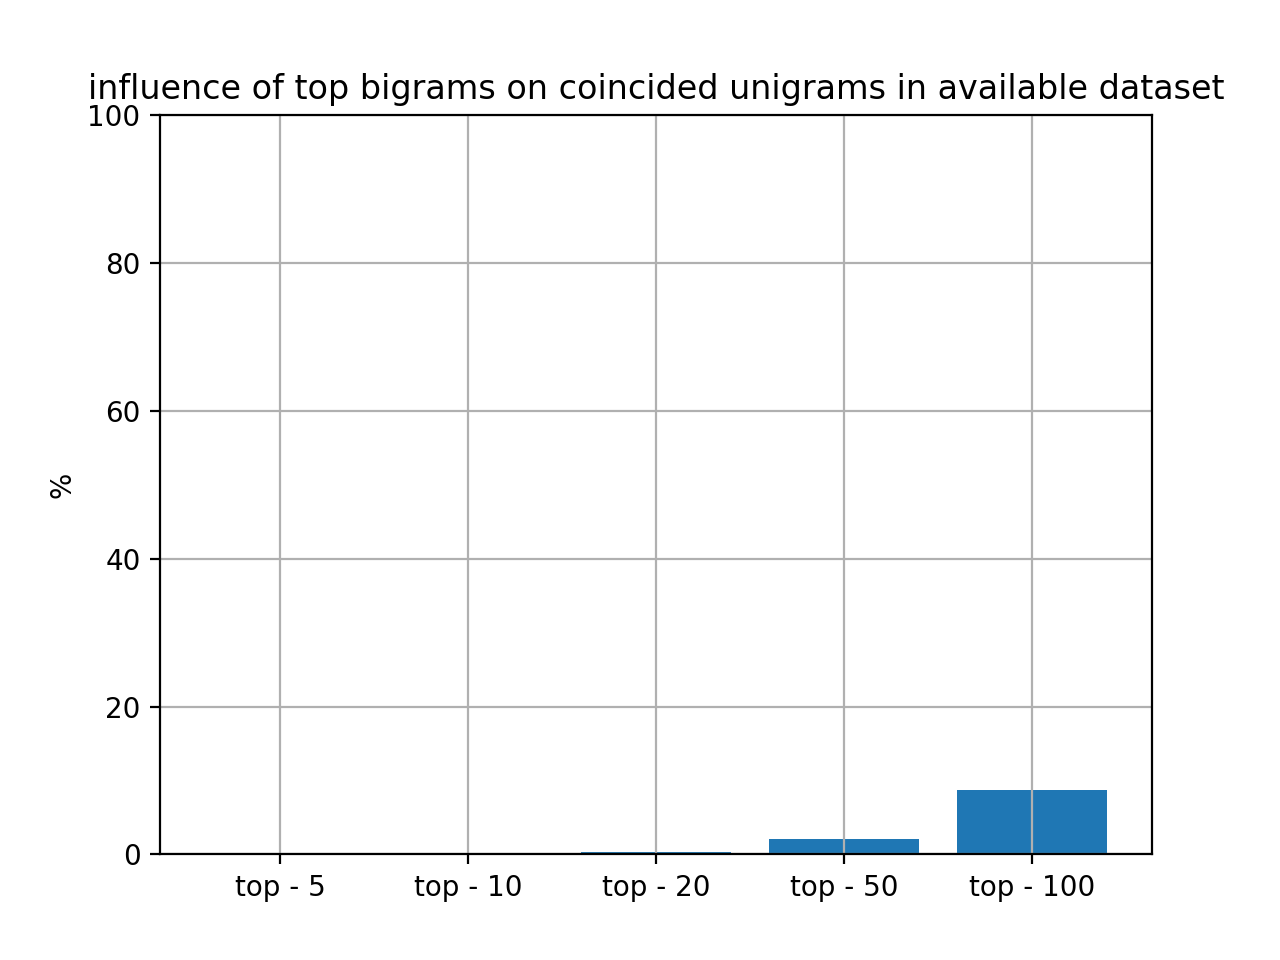

In [312]:
show_statistics(tops, procents_bigrams_neg, "influence of top bigrams on coincided unigrams in available dataset")

## Trigrams

### positive

In [272]:
pos_trigram_scores[:10]

,ngram,score
0,необхідне для проживання,0.241606
1,чисто зручні ліжка,0.241606
2,гарне розташування готелю,0.241606
3,комфортний чистий номер,0.241606
4,кухня де можна,0.241606
5,кухні все необхідне,0.241606
6,ліжко дуже зручне,0.241606
7,привітні дівчата на,0.241606
8,все як на,0.241606
9,все що треба,0.241606


In [285]:
pos_trigram_scores[90:100]

,ngram,score
90,номер привітний персонал,0.241606
91,дуже чисто та,0.241606
92,дуже чисто комфортно,0.241606
93,дуже чисто затишно,0.241606
94,необхідне для приготування,0.241606
95,дуже сподобалось розташування,0.241606
96,на кухні все,0.241606
97,розташування центр міста,0.241606
98,неподалік від центру,0.241606
99,на березі моря,0.241606


In [286]:
tops = [5, 10, 20, 50 , 100]
num_of_coincided_trigrams_pos = []

In [288]:
for top in tops:
    top_ngram_mng = ToNgramManager(None, None, pos_trigram_scores[:top])
    top_ngram_mng.ignore_score(True)
    
    num_of_coincided_trigrams = calc_num_of_coincided_ngram(pos_texts, 
                                                            lambda text: top_ngram_mng.find_top_trigrams(text))
    
    num_of_coincided_trigrams_pos.append(num_of_coincided_trigrams)



In [289]:
procents_trigrams = 100 * np.array(num_of_coincided_trigrams_pos) / (len(pos_texts))

<IPython.core.display.Javascript object>


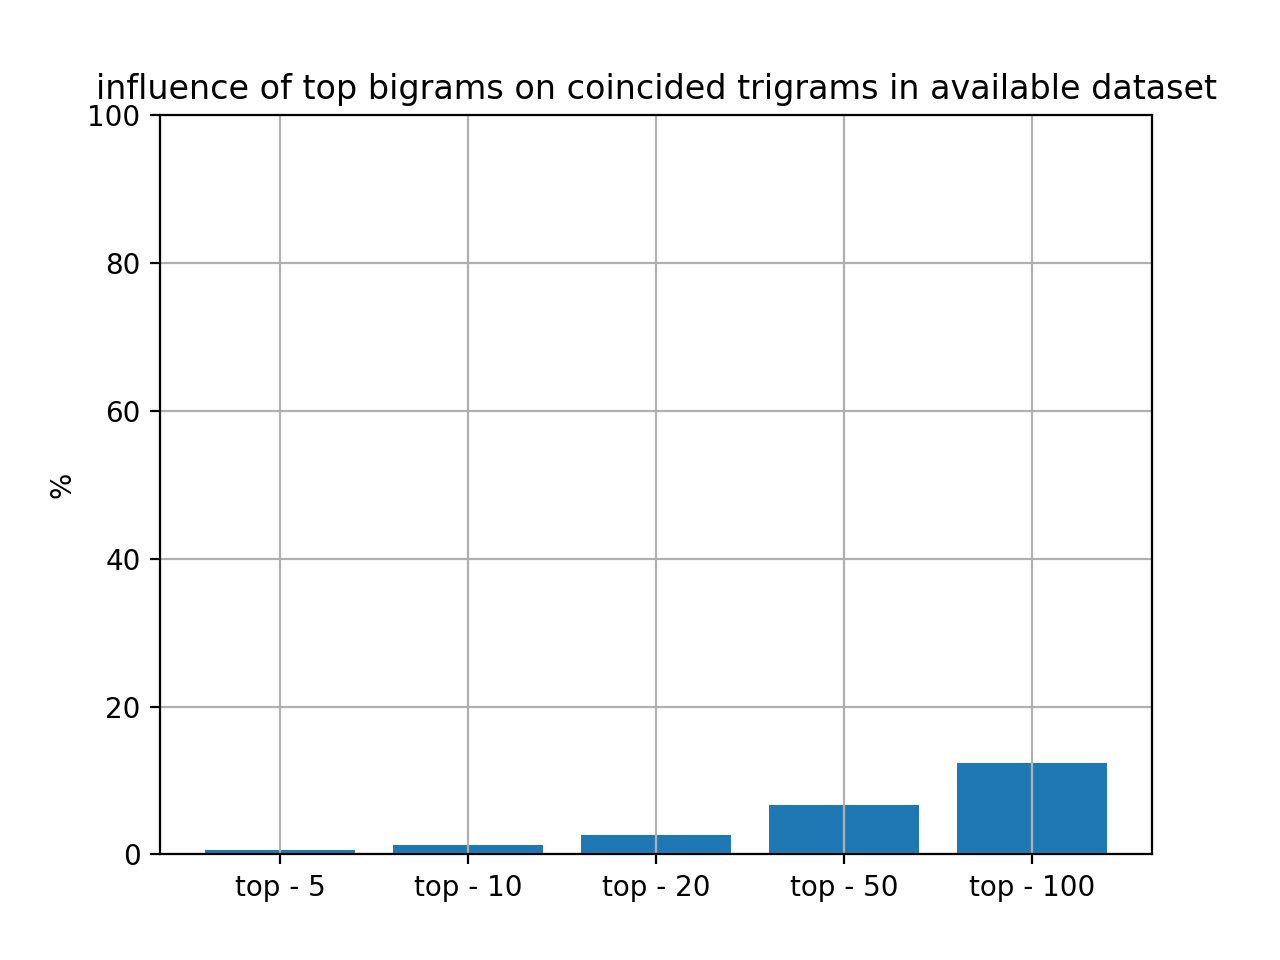

In [291]:
show_statistics(tops, procents_trigrams, "influence of top bigrams on coincided trigrams in available dataset")

### negative

In [321]:
neg_trigram_scores[:10]

,ngram,score
0,на сайті не,0.369893
1,єдине що не,0.369893
2,залишає бажати кращого,0.369893
3,це не дуже,0.369893
4,було гарячої води,0.369893
5,що відбувається коридорі,0.369893
6,не сподобалося те,0.369893
7,сніданок міг би,0.369893
8,могла бути кращою,0.369893
9,не сподобалось те,0.369893


In [322]:
neg_trigram_scores[90:100]

,ngram,score
90,на мій погляд,0.244955
91,через те що,0.244955
92,що не було,0.235195
93,жодного разу не,0.233674
94,номер був на,0.228564
95,на четвертому поверсі,0.223765
96,на жаль не,0.220131
97,дуже далеко від,0.218626
98,на наступний день,0.214991
99,те що на,0.214991


In [323]:
tops = [5, 10, 20, 50 , 100]
num_of_coincided_trigrams_neg = []

In [324]:
for top in tops:
    top_ngram_mng = ToNgramManager(None, None, neg_trigram_scores[:top])
    top_ngram_mng.ignore_score(True)
    
    num_of_coincided_trigrams = calc_num_of_coincided_ngram(pos_texts, 
                                                            lambda text: top_ngram_mng.find_top_trigrams(text))
    
    num_of_coincided_trigrams_neg.append(num_of_coincided_trigrams)



In [325]:
procents_trigrams_neg = 100 * np.array(num_of_coincided_trigrams_neg) / (len(neg_texts))

<IPython.core.display.Javascript object>


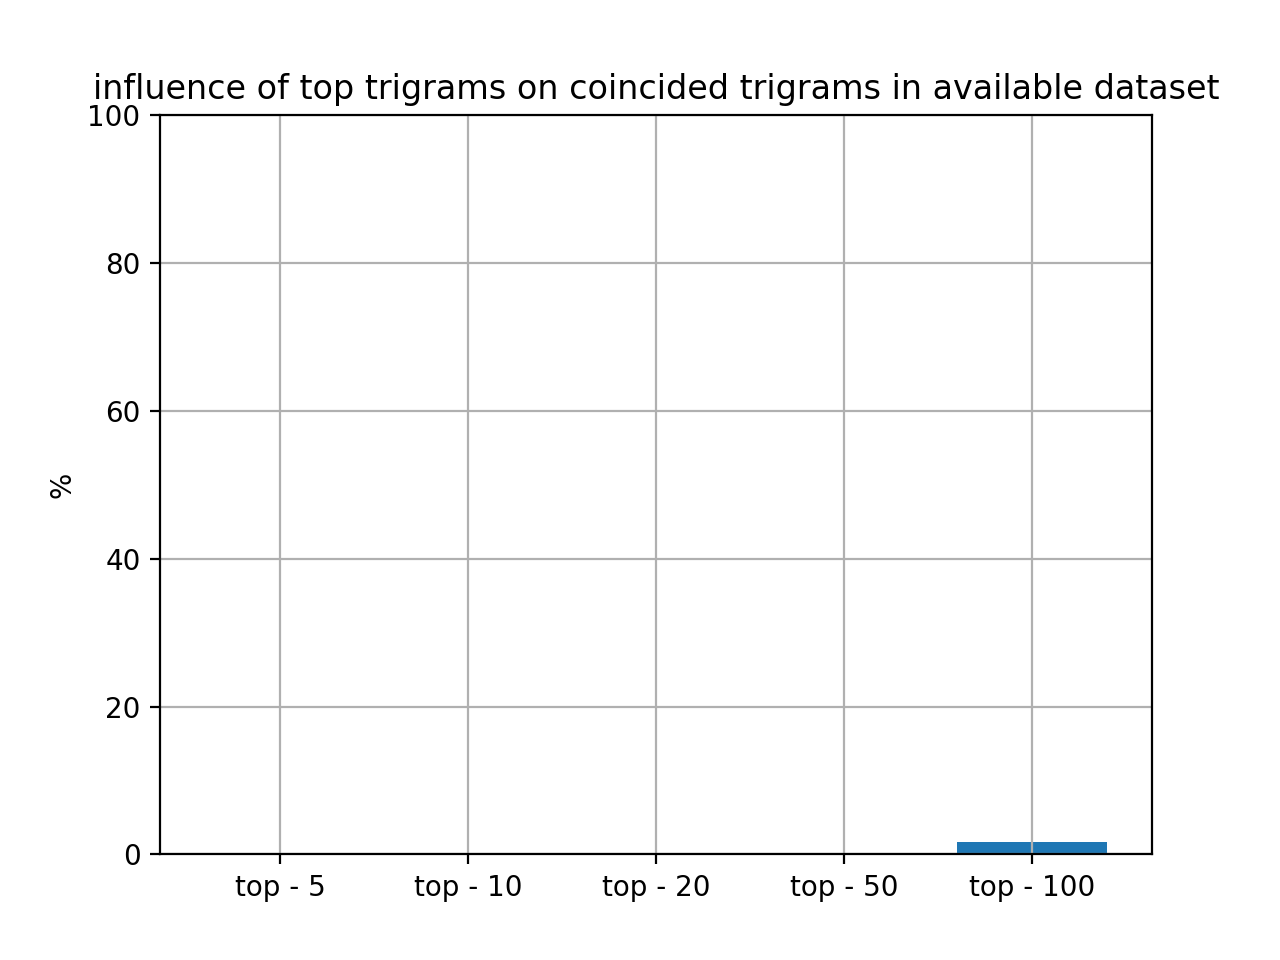

In [326]:
show_statistics(tops, procents_trigrams_neg, "influence of top trigrams on coincided trigrams in available dataset")

## Example for several pos and neg texts using default threshold

## positive text

In [393]:
pos_text = df['text'][127]
pos_text

'Все дуже сподобалось, чудове місцерозташування, привітний персонал, номер кращої категорії, як комплімент! Смачний сніданок! Кімната для паління! Надіємось, що ще повернемось!'

In [394]:
top_ngram_mng = ToNgramManager(unigram_scores, bigram_scores, trigram_scores)
# top_ngram_mng.ignore_score(True)

In [395]:
pos_unigrams = top_ngram_mng.find_top_unigrams(pos_text)
print("Found positive unigrams: ")
print(pos_unigrams)

Found positive unigrams: 
['місцерозташування', 'персонал', 'привітний', 'смачний', 'чудове']


In [396]:
pos_bigrams = top_ngram_mng.find_top_bigrams(pos_text)
print("Found positive bigrams: ")
print(pos_bigrams)

Found positive bigrams: 
['дуже сподобалось', 'привітний персонал', 'смачний сніданок']


In [397]:
pos_trigrams = top_ngram_mng.find_top_trigrams(pos_text)
print("Found positive trigrams: ")
print(pos_trigrams)

Found positive trigrams: 
['все дуже сподобалось', 'привітний персонал номер']


## negative text

In [386]:
neg_top_ngram_mng = ToNgramManager(neg_unigram_scores, neg_bigram_scores, neg_trigram_scores)

In [431]:
neg_text = df['text'][25513]
print(df['pos_neg_identifier'][25529])
neg_text

0


'Трішки погана шумоізоляція, або це сусіди загаласливі'

In [432]:
neg_unigrams = neg_top_ngram_mng.find_top_unigrams(neg_text)
print("Found negative unigrams: ")
print(neg_unigrams)

Found negative unigrams: 
['або', 'погана', 'сусіди', 'трішки', 'шумоізоляція']


In [433]:
neg_bigrams = neg_top_ngram_mng.find_top_bigrams(neg_text)
print("Found negative bigrams: ")
print(neg_bigrams)

Found negative bigrams: 
['погана шумоізоляція']


In [434]:
neg_trigrams = top_ngram_mng.find_top_trigrams(neg_text)
print("Found negative trigrams: ")
print(neg_trigrams)

Found negative trigrams: 
[]
